<a href="https://colab.research.google.com/github/viniciusanl/Natural-Language-Analysis-And-Processing/blob/main/natural_language_analysis_and_processin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação

O objetivo principal deste trabalho é estudar, entender e implementar as principais técnicas de análise e processamento de linguagem natural. Para que esse trabalho se torne possível, será necessário utilizar a biblioteca NLTK (Natural Language Toolkit) que possui ferramentas para realizar processamento simbólico e estatístico de linguagem natural.


* [Dcumentation NLTK - Natural Language Toolkit](https://www.nltk.org)
* [Natural Language Processing with Python Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book_1ed/)
* [Processing Raw Text](https://www.nltk.org/book_1ed/ch03.html)

# **Importar bibliotecas necessárias**

In [1]:
import nltk, re, pprint, string, urllib.request

# Download de todos os componentes necessários da biblioteca NLTK

In [2]:
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

# Criando as stopwords em português e inglês

In [40]:
english_stopwords = nltk.corpus.stopwords.words('english')
portuguese_stopwords = nltk.corpus.stopwords.words('portuguese')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Adiciona algumas stopwords em português para tratar algumas divergências analíticas
add_stopwords_pt = ['capitulo', 'capítulo']
portuguese_stopwords.extend(add_stopwords_pt)

# Criando a função de processamento de texto

O objetivo dessa função e remover as quebras de linhas e alguns caracteres especiais que não foram removidos com o decode

In [69]:
def processing_text(str_text, _stopwords):
  for i in string.punctuation:
    str_text = str_text.lower().replace(i, '')

  text_format = str_text.replace('\n', ' ').replace('\x97', '').split(' ')
  #text_format = str_text.split(' ')

  no_stopwords = [words for words in text_format if words not in _stopwords]

  return(' '.join(no_stopwords))

# Escolhendo os textos a serem utilizados na função de processamento

Foram utilizadas as obras Shakespeare Caesar e Machado de Assis - Memórias Póstumas de Brás Cubas (1881)

In [70]:
shakespeare_caesar = nltk.corpus.gutenberg.raw('shakespeare-caesar.txt').encode("UTF-8")
obra_machado = nltk.corpus.machado.raw('romance/marm05.txt').encode("UTF-8")

sc_format = processing_text(shakespeare_caesar.decode("UTF-8"), english_stopwords)

om_format = processing_text(obra_machado.decode("UTF-8"), portuguese_stopwords)

# Tokenização dos textos

A tokenização, também conhecida como segmentação de palavras, é responsável por quebrar as palavras de cada texto analisado, ou seja, ele identifica o início e o término das palavras do texto e faz a divisão.

- Exemplo sem tokenização: "Ontem choveu muito em minha cidade"

- Texto tokenizado: "Ontem", "choveu", "muito", "em", "minha", "cidade"

In [71]:
tokens_shakespeare = nltk.tokenize.word_tokenize(sc_format)
tokens_machado = nltk.tokenize.word_tokenize(om_format)

# Análise de frequência de palavras

Uma distribuição de frequência pode ser usada para registrar a frequência de cada tipo de palavra em um documento, ou seja, essa função tem por objetivo calcular a inscidencia de vezes que uma palavra foi mencionada em um texto, documento, string.

In [72]:
prob_shakespeare = nltk.probability.FreqDist(tokens_shakespeare)
prob_machado = nltk.probability.FreqDist(tokens_machado)

# Print das 10 palavras que mais se repetem nos textos

In [73]:
print(prob_shakespeare.most_common(10))
print(prob_machado.most_common(10))

[('caesar', 190), ('brutus', 161), ('bru', 153), ('haue', 147), ('shall', 125), ('thou', 115), ('cassi', 107), ('cassius', 85), ('antony', 75), ('come', 74)]
[('virgília', 202), ('coisa', 147), ('olhos', 138), ('disse', 130), ('nada', 126), ('outro', 124), ('vida', 118), ('outra', 116), ('tempo', 114), ('porque', 113)]


# Palavra que mais se repete

In [44]:
print('Palavra que mais se repete no texto de Shakespeare Caesar: ' + prob_shakespeare.max())
print('Palavra que mais se repete no texto do Machado de Assis - Memórias Póstumas de Brás Cubas (1881): ' + prob_machado.max())

Palavra que mais se repete no texto de Shakespeare Caesar: caesar
Palavra que mais se repete no texto do Machado de Assis - Memórias Póstumas de Brás Cubas (1881): virgília


# Plot de 20 palavras que mais se repete nas obras

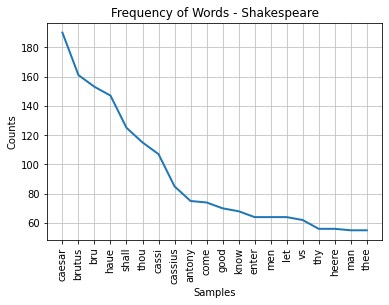

In [45]:
prob_shakespeare.plot(20, title='Frequency of Words - Shakespeare')

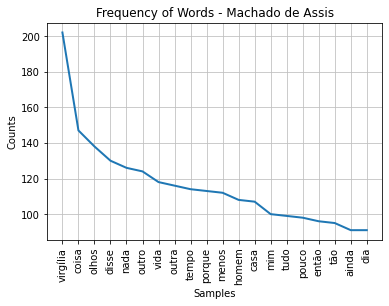

In [46]:
prob_machado.plot(20, title='Frequency of Words - Machado de Assis')

In [47]:
analytics_shakespeare = nltk.Text(tokens_shakespeare)
analytics_machado = nltk.Text(tokens_machado)

# Palavras similares

In [59]:
analytics_machado.similar('virgília')

disse medo quê superficial


In [49]:
analytics_shakespeare.similar('caesar')

enter know would antony heere bid loue bru please mark affraid liuing
octauius rose


# Palavras dentro de diferentes contextos

Para isso, vamos pegar a segunda palavra que mais se repete em ambas as obras

In [67]:
analytics_machado.concordance('coisa')

Displaying 25 of 147 matches:
terceira edição emendei ainda alguma coisa suprimi duas três dúzias linhas assi
fessasse escrito livros cem leitores coisa admira consterna admira provavelment
o deixasse rolar chão convulsa óbito coisa altamente dramática solteirão expira
al corpo faziaseme planta pedra lodo coisa nenhuma morri pneumonia disser menos
ntigos terços infantaria amor glória coisa verdadeiramente humana homem consegu
igual agora austera logo brincalhona coisa edifica destrói inflama regala todav
a origem nilo sobretudo valia alguma coisa menos consumação mesmos séculos refl
enlouqueci passas concepção alienado coisa vã razão ausente pode reger palpar n
e tempo largo longe através nevoeiro coisa única imagina leitor redução séculos
a diante mim flagelos delícias desde coisa chama glória outra chama miséria via
escompassado idiota tens razão disse coisa divertida vale pena talvez monótona 
amos lá pandora abre ventre digereme coisa divertida digereme resposta compelir
tos razão 

In [68]:
analytics_shakespeare.concordance('brutus')

Displaying 25 of 161 matches:
rse calphurnia portia decius cicero brutus cassius caska soothsayer murellus f
der cassius desires ile leaue cassi brutus obserue late haue eyes gentlenesse 
 cassius one construe neglect poore brutus himselfe warre forgets shewes loue 
warre forgets shewes loue men cassi brutus haue much mistook passion meanes wh
 value worthy cogitations tell good brutus see face brutus cassius eye sees se
gitations tell good brutus see face brutus cassius eye sees selfe reflection t
ings cassius tis iust much lamented brutus haue mirrors turne hidden worthines
me except immortall caesar speaking brutus groaning vnderneath ages yoake haue
erneath ages yoake haue wishd noble brutus eyes bru dangers would leade cassiu
haue seeke selfe cas therefore good brutus prepard heare since know can not se
selfe selfe yet know iealous gentle brutus common laughter vse stale ordinary 
honor feare death cassi know vertue brutus well know outward fauour well honor
 sometime masters fate

# Bigramas de texto

In [ ]:
analytics_machado.collocations()

quincas borba; lobo neves; brás cubas; alguma coisa; dia seguinte;
outra vez; alguns instantes; cinco contos; rio janeiro; outra coisa;
mesma coisa; muitas vezes; coisa nenhuma; nesta página; meia dobra;
idéia fixa; alma sensível; ponta nariz; tio joão; arma virumque


In [ ]:
analytics_shakespeare.collocations()

mark antony; marke antony; ides march; thou art; thou hast; good
morrow; caius ligarius; metellus cymber; art thou; exeunt manet; mine
owne; varrus claudio; fell downe; lord bru; good night; haue seene;
enter lucius; beware ides; would haue; shall finde


# Teste de leitura de informações coletadas em um site

In [ ]:
text_web = urllib.request.urlopen("https://www.gutenberg.org/files/45438/45438-8.txt").read()

book_la_isla_del_tesoro = processing_text(str(text_web, 'latin1'), spanish_stopwords)

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
